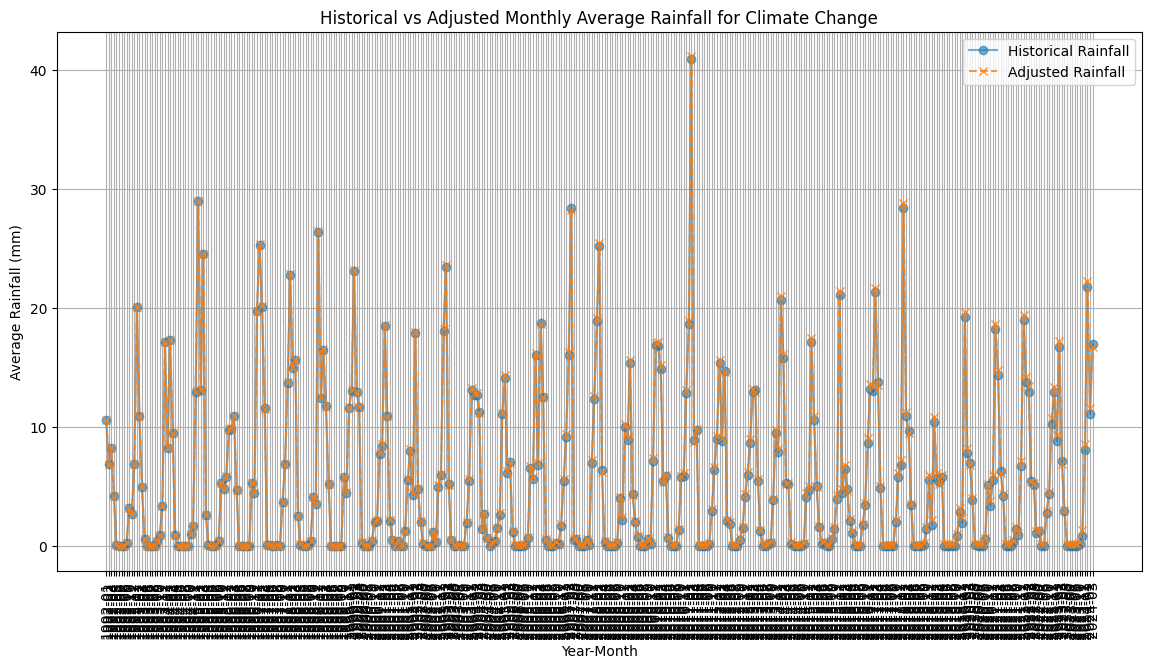

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'RAINFALL_FINAL.csv'  # Adjust this path
rainfall_data = pd.read_csv(file_path)

# Ensure the Date column is in datetime format
rainfall_data['Date'] = pd.to_datetime(rainfall_data['Date'], format='%d/%m/%Y')

# Sort data by Date
rainfall_data = rainfall_data.sort_values(by='Date')

# Extract year and month
rainfall_data['Year'] = rainfall_data['Date'].dt.year
rainfall_data['Month'] = rainfall_data['Date'].dt.month

# Define seasonal adjustments (mm/decade)
annual_adjustment = 40 / 10 / 365  # Annual increase per day
cool_season_adjustment = 20 / 10 / 365  # Cool season increase per day
wet_season_adjustment = 80 / 10 / 365  # Wet season increase per day
summer_adjustment = 60 / 10 / 365  # Summer increase per day
autumn_adjustment = -40 / 10 / 365  # Autumn decrease per day
winter_adjustment = 10 / 10 / 365  # Winter increase per day
spring_adjustment = 60 / 10 / 365  # Spring increase per day

# Adjust based on seasons, limiting negative values to zero
adjusted_rainfall = []
for i, row in rainfall_data.iterrows():
    year = row['Year']
    month = row['Month']
    
    if 4 <= month <= 10:  # Cool season (April-October)
        adjustment = (year - 1994) * cool_season_adjustment
    elif 10 <= month <= 4:  # Wet season (October-April)
        adjustment = (year - 1994) * wet_season_adjustment
    elif month in [12, 1, 2]:  # Summer (December-February)
        adjustment = (year - 1994) * summer_adjustment
    elif month in [3, 4, 5]:  # Autumn (March-May)
        adjustment = (year - 1994) * autumn_adjustment
    elif month in [6, 7, 8]:  # Winter (June-August)
        adjustment = (year - 1994) * winter_adjustment
    elif month in [9, 10, 11]:  # Spring (September-November)
        adjustment = (year - 1994) * spring_adjustment
    
    adjusted_value = row['Rainfall'] + adjustment
    adjusted_value = max(0, adjusted_value)  # Ensure no negative values
    adjusted_rainfall.append(adjusted_value)

# Add the adjusted rainfall to the DataFrame
rainfall_data['Adjusted Rainfall'] = adjusted_rainfall

# Aggregate to monthly averages, excluding the Date column from the aggregation
monthly_averages = rainfall_data.groupby(rainfall_data['Date'].dt.to_period('M'))[['Rainfall', 'Adjusted Rainfall']].mean()

# Plot the monthly averages
plt.figure(figsize=(14, 7))
plt.plot(monthly_averages.index.astype(str), monthly_averages['Rainfall'], label='Historical Rainfall', alpha=0.6, marker='o')
plt.plot(monthly_averages.index.astype(str), monthly_averages['Adjusted Rainfall'], label='Adjusted Rainfall', linestyle='--', alpha=0.8, marker='x')
plt.xlabel('Year-Month')
plt.ylabel('Average Rainfall (mm)')
plt.legend()
plt.title('Historical vs Adjusted Monthly Average Rainfall for Climate Change')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


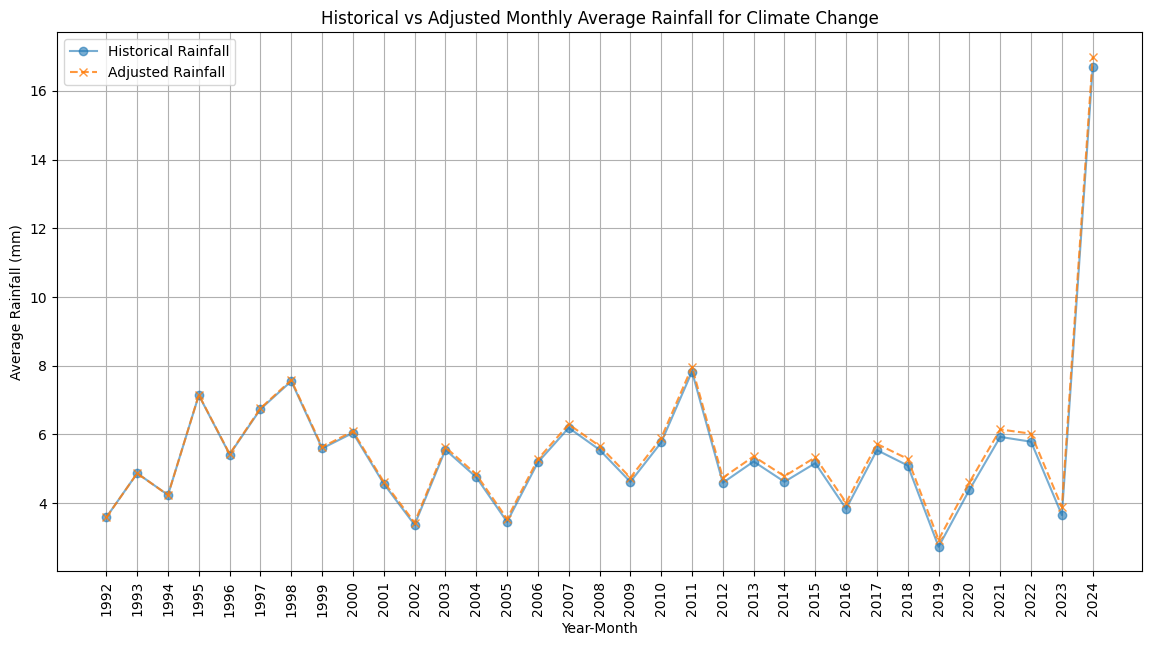

In [2]:
monthly_averages = rainfall_data.groupby(rainfall_data['Date'].dt.to_period('Y'))[['Rainfall', 'Adjusted Rainfall']].mean()

# Plot the monthly averages
plt.figure(figsize=(14, 7))
plt.plot(monthly_averages.index.astype(str), monthly_averages['Rainfall'], label='Historical Rainfall', alpha=0.6, marker='o')
plt.plot(monthly_averages.index.astype(str), monthly_averages['Adjusted Rainfall'], label='Adjusted Rainfall', linestyle='--', alpha=0.8, marker='x')
plt.xlabel('Year-Month')
plt.ylabel('Average Rainfall (mm)')
plt.legend()
plt.title('Historical vs Adjusted Monthly Average Rainfall for Climate Change')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [ ]:
# Save to CSV
df = pd.DataFrame({
    'Year': np.repeat(years, 12),
    'Month': months,
    'Historical Rainfall': historical_rainfall,
    'Adjusted Rainfall': adjusted_rainfall
})
df.to_csv('adjusted_rainfall.csv', index=False)
